# Emergency 911 calls EDA project

#### Dataset is collected from kaggle 

Dataset contains:

    lat : String variable, Latitude
    lng: String variable, Longitude
    desc: String variable, Description of the Emergency Call
    zip: String variable, Zipcode
    title: String variable, Title
    timeStamp: String variable, YYYY-MM-DD HH:MM:SS
    twp: String variable, Township
    addr: String variable, Address
    e: String variable, Dummy variable

#### Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Set %matplotlib inline

In [2]:
%matplotlib inline

#### Load data into a dataframe

In [3]:
df = pd.read_csv('911.csv')

#### Short preview of the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
# check missing values
# zip and twp consist null values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [8]:
# cjeck missing values in zip column
df[df['zip'].isnull()]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:09:49,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:00:38,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:58:22,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1
...,...,...,...,...,...,...,...,...,...
663492,40.136973,-75.472723,EGYPT RD; UPPER PROVIDENCE; Station 322A; 202...,NaN,EMS: VEHICLE ACCIDENT,2020-07-29 14:50:23,UPPER PROVIDENCE,EGYPT RD,1
663506,40.121341,-75.133677,SUSQUEHANNA RD; ABINGTON; Station 382; 2020-0...,NaN,EMS: VEHICLE ACCIDENT,2020-07-29 15:30:22,ABINGTON,SUSQUEHANNA RD,1
663510,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Fire: VEHICLE FIRE,2020-07-29 15:32:04,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,1
663513,40.097222,-75.376195,RAMP RT202 NB TO RT422 & RT202 NB; UPPER MERI...,NaN,Traffic: VEHICLE FIRE -,2020-07-29 15:34:11,UPPER MERION,RAMP RT202 NB TO RT422 & RT202 NB,1


#### Basic Exploratory Data Analysis

In [9]:
# top 5 zipcodes for 911 calls 
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [98]:
# bottom 5 zipcodes for 911 calls 
df['zip'].value_counts().tail(5)

77316.0    1
19134.0    1
19135.0    1
8502.0     1
18938.0    1
Name: zip, dtype: int64

In [11]:
#top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [99]:
#bottom 5 townships (twp) for 911 calls
df['twp'].value_counts().tail(5)

EAST GREENVILLE    1316
BRYN ATHYN         1254
GREEN LANE          385
PHILA COUNTY        267
LEHIGH COUNTY       190
Name: twp, dtype: int64

In [13]:
#count unique values of title column
df['title'].nunique()

148

In [14]:
df['title']

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
663517    Traffic: VEHICLE ACCIDENT -
663518          EMS: GENERAL WEAKNESS
663519          EMS: VEHICLE ACCIDENT
663520            Fire: BUILDING FIRE
663521    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 663522, dtype: object

In [15]:
# create Reason column
#Split values from title and add into a new column into datadrame 
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [16]:
#check the new column
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [17]:
# most common reasons for calling 911
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

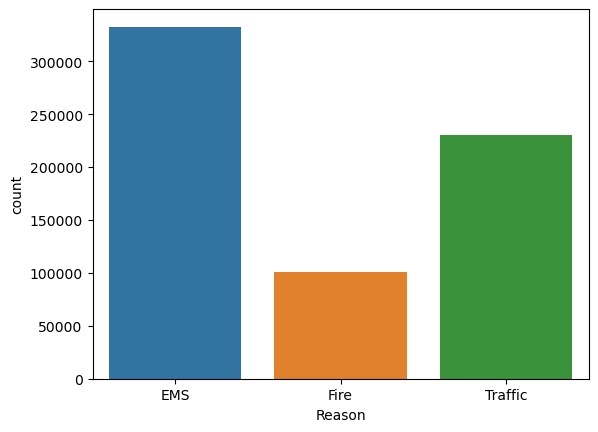

In [18]:
#use countplot to display the reasons behind the emergency calling
# it shows that EMS is the most common reason for emergency calling in 911
sns.countplot(x='Reason',data=df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [20]:
#convert str to datetime 
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [21]:
time = df['timeStamp']

In [22]:
# add a hour column
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [23]:
# createing columns for year, month name, and day of week 
df['Years'] = pd.DatetimeIndex(df['timeStamp']).year
df['Day of Week'] = df['timeStamp'].dt.day_name().str[:3]
df['Name of Month'] = df['timeStamp'].dt.month_name().str[:3]


In [46]:
#createing date column
df['Dates'] = pd.to_datetime(df['timeStamp']).dt.date

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Years,Day of Week,Month,Dates
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,Thu,Dec,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,Thu,Dec,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,2015,Thu,Dec,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,2015,Thu,Dec,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,2015,Thu,Dec,2015-12-10


In [25]:
#rename the Name of month column to Month 
df.rename(columns = {'Name of Month':'Month'}, inplace = True)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Years,Day of Week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,Thu,Dec
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,Thu,Dec
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,2015,Thu,Dec
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,2015,Thu,Dec
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,2015,Thu,Dec


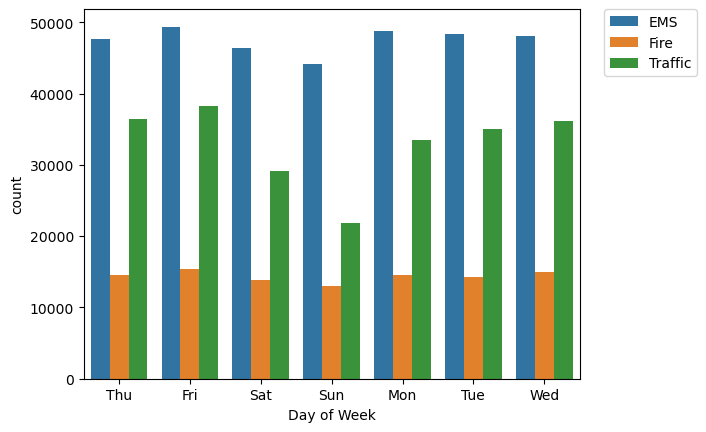

In [28]:
# create a countplot for the day of week against Reasons
sns.countplot(x='Day of Week',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

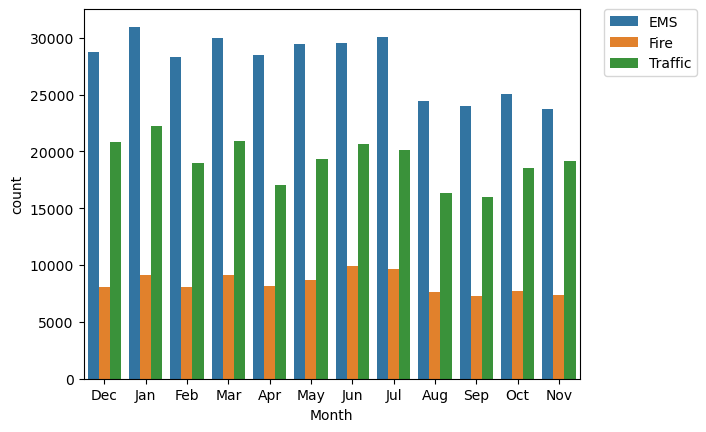

In [29]:
# create a countplot for the month against Reasons

sns.countplot(x='Month',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


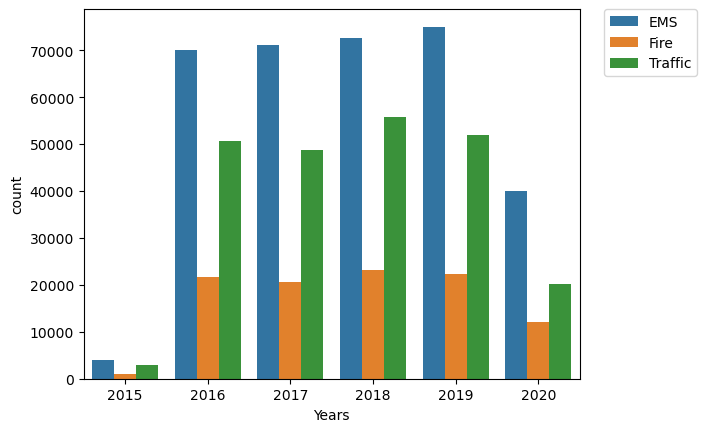

In [30]:
## create a countplot for the year against Reasons

sns.countplot(x='Years',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [103]:
byYear = df.groupby('Years').count()
byYear.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Month,Dates
Years,,,,,,,,,,,,,,
2015,7916,7916,7916,6902,7916,7916,7911,7916,7916,7916,7916,7916,7916,7916
2016,142360,142360,142360,124495,142360,142360,142317,142360,142360,142360,142360,142360,142360,142360
2017,140343,140343,140343,123768,140343,140343,140288,140343,140343,140343,140343,140343,140343,140343
2018,151527,151527,151527,132605,151527,151527,151463,151527,151527,151527,151527,151527,151527,151527
2019,149118,149118,149118,130799,149118,149118,149035,149118,149118,149118,149118,149118,149118,149118


<AxesSubplot:xlabel='Years'>

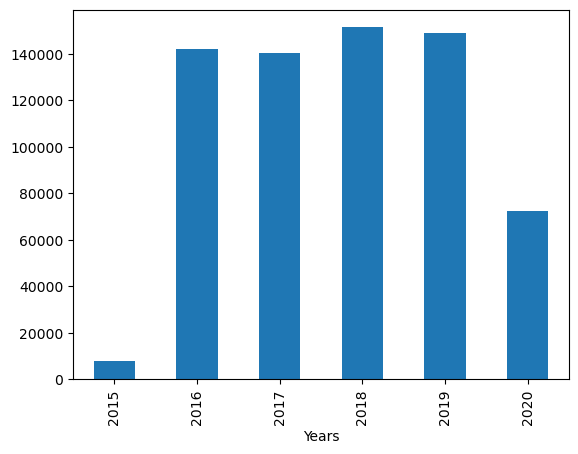

In [41]:
# total calls against years
byYear['lat'].plot.bar()

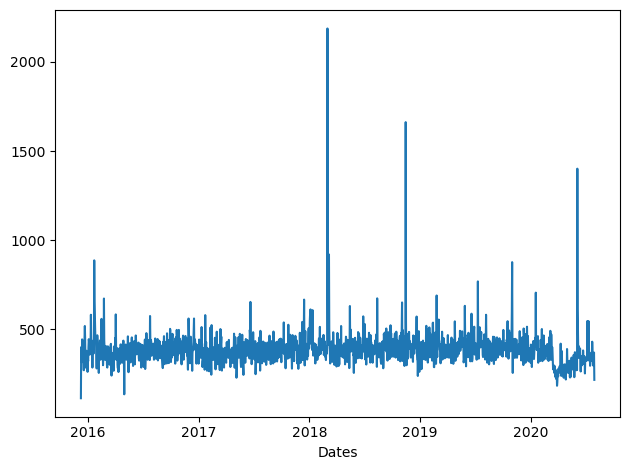

In [62]:
# total calls per date
df.groupby('Dates').count()['lat'].plot()
plt.tight_layout()


In [91]:
# create a pivot table for counting how many calls are coming in each hour
df_pivot_day = pd.pivot_table(df, values='Reason', index='Day of Week', columns='Hour',
                          aggfunc='count')

In [92]:
df_pivot_day.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

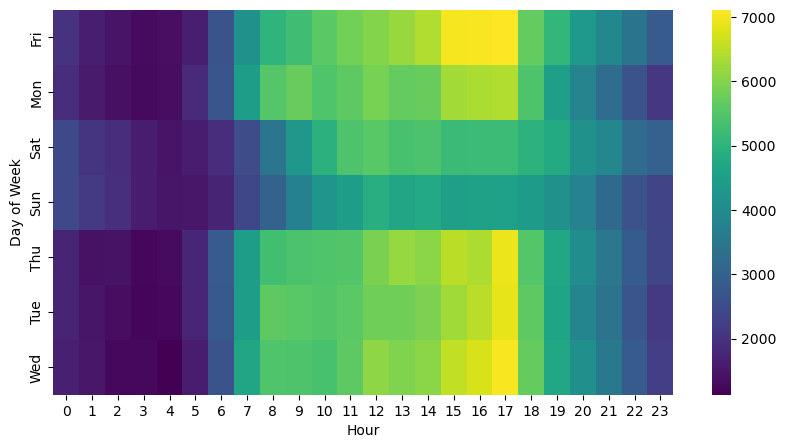

In [93]:
# Heatmap calling 911 in hourly basis
plt.figure(figsize=(10,5))
sns.heatmap(df_pivot_day,cmap='viridis')

In [95]:
# create a pivot table for counting how many calls are coming in each month
df_pivot_month = pd.pivot_table(df, values='Reason', index='Day of Week', columns='Month',
                          aggfunc='count')

In [96]:
df_pivot_month.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Day of Week,,,,,,,,,,,,
Fri,7997,7336,9305,8255,9309,8681,9207,10941,8904,8379,6934,7694
Mon,8410,6854,8492,8747,8896,9499,8511,8060,7881,6722,8075,6598
Sat,7514,6111,8592,7593,8475,7748,8198,8050,7223,6773,6609,6566
Sun,6865,5275,7165,6452,7478,7859,6837,6766,6694,5196,6316,5956
Thu,7722,7508,8151,7997,9055,8378,9489,8849,8740,8358,7482,6954


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

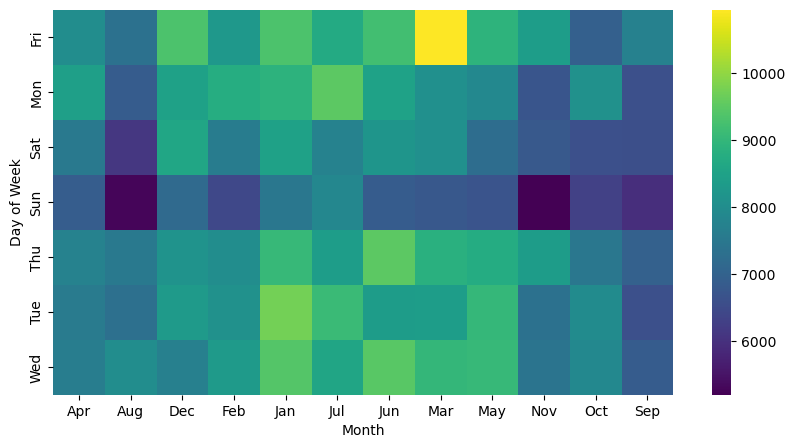

In [106]:
# Heatmap calling 911 in monthly basis
plt.figure(figsize=(10,5))
sns.heatmap(df_pivot_month,cmap='viridis')